# <b>Fondamenti di Analisi Dati</b> - a.a. 2020/2021

# 18 Adaptive Boosting

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from statsmodels.datasets import get_rdataset
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

iris = get_rdataset('iris')

C:\Users\visig\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


In [2]:
iris.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
X = iris.data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]

X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = iris.data['Species']

y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=123)

model1 = abc.fit(X_train, y_train)
 
y_pred = model1.predict(X_test)

I parametri più importanti di <b>AdaBoostClassifier</b> sono <i>base_estimator</i>, <i>n_estimators</i> e <i>learning_rate</i>:
<ul>
<li> <b>base_estimator</b> indica l'algoritmo da utilizzare per allenare i modelli deboli (default: DecisionTreeClassifier,  max_depth=1)
<li> <b>n_estimators</b> è il numero di modelli da allenare iterativamente (default=50)
<li> <b>learning_rate</b> è il contributo di ciascun modello ai pesi (default=1). Ridurre il learning_rate significherà che i pesi saranno aumentati o diminuiti in misura ridotta, aumentando così il tempo di training del modello 
</ul>

In [8]:
print("AdaBoost\n")
print("Error:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred.round(), normalize=True))
print("------------------------------------------------------\n")

AdaBoost

Error: 0.044444444444444446
MSE: 0.044444444444444446

Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

Accuracy
0.9555555555555556
------------------------------------------------------



In [9]:
from sklearn.svm import SVC

svc=SVC(kernel='linear', C=50, probability=True)

svm = svc.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred.round(), normalize=True))
print("------------------------------------------------------\n")

SVM

Error: 0.044444444444444446
MSE: 0.044444444444444446

Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

Accuracy
0.9555555555555556
------------------------------------------------------



In [10]:
abc =AdaBoostClassifier(n_estimators=4, base_estimator=svc, learning_rate=0.01, random_state=123)
model2 = abc.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print("AdaBoost - SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred.round(), normalize=True))
print("------------------------------------------------------\n")

AdaBoost - SVM

Error: 0.022222222222222223
MSE: 0.022222222222222223

Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy
0.9777777777777777
------------------------------------------------------



In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

abc =AdaBoostClassifier(n_estimators=15, base_estimator=nb, learning_rate=1, random_state=123)
model2 = abc.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print("AdaBoost - NB\n")
print("Error:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred.round(), normalize=True))
print("------------------------------------------------------\n")

AdaBoost - NB

Error: 0.022222222222222223
MSE: 0.022222222222222223

Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy
0.9777777777777777
------------------------------------------------------



DecisionTree with features [0, 1] has a score of 0.8133333333333334
RandomForest with 4 estimators with features [0, 1] has a score of 0.9066666666666666
AdaBoost with 4 estimators with features [0, 1] has a score of 0.8266666666666667
DecisionTree with features [0, 2] has a score of 0.9533333333333334
RandomForest with 4 estimators with features [0, 2] has a score of 0.98
AdaBoost with 4 estimators with features [0, 2] has a score of 0.9933333333333333
DecisionTree with features [2, 3] has a score of 0.9733333333333334
RandomForest with 4 estimators with features [2, 3] has a score of 0.9866666666666667
AdaBoost with 4 estimators with features [2, 3] has a score of 0.9933333333333333


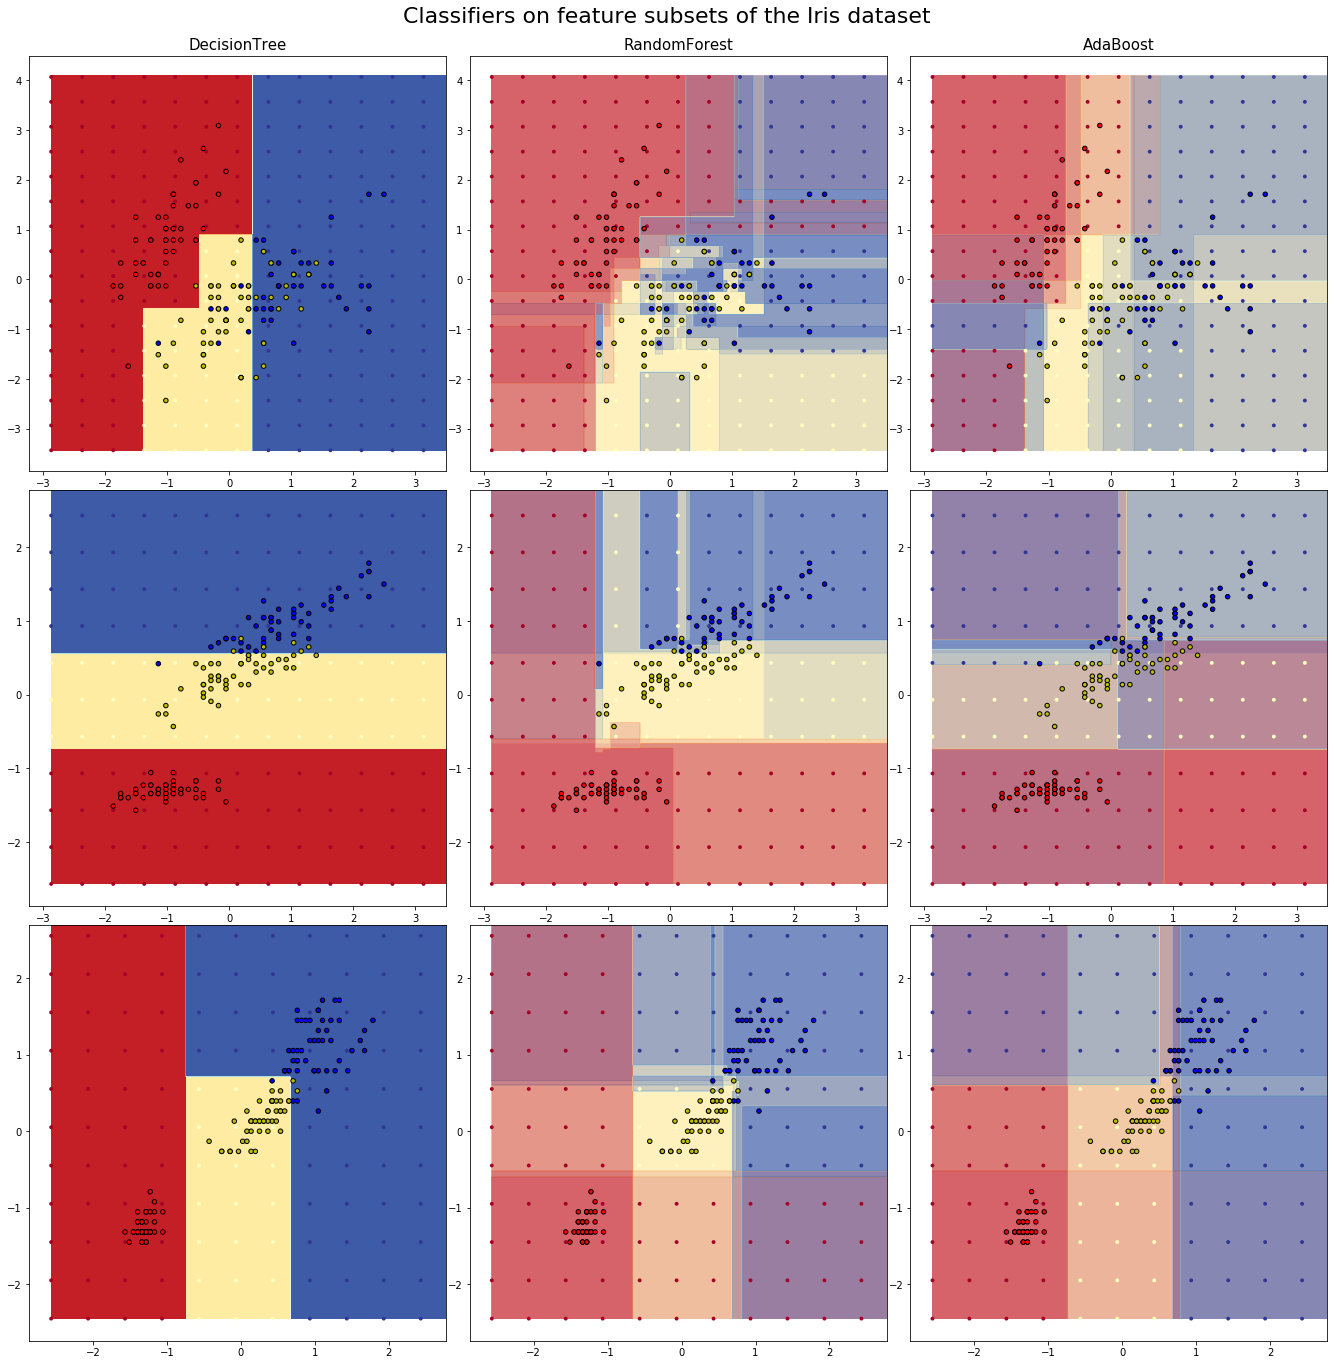

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

#In the first row, the classifiers are built using the sepal width and the sepal length features only,
#on the second row using the petal length and sepal length only,
#and on the third row using the petal width and the petal length only.

# Parameters
n_classes = 3
n_estimators = 4
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=3),
          RandomForestClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]
plt.figure(figsize=(20,20))
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=15)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=22)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=6)
plt.show()